============ Prediction for lr = 0.1 ============
X= (0, 0)
result =  0.010646630477953162
X= (1, 0)
result =  0.16034700260180995
X= (0, 1)
result =  0.15940489129546945
X= (1, 1)
result =  0.7709171153732488
============ Prediction for lr = 0.2 ============
X= (0, 0)
result =  0.0016003939773532082
X= (1, 0)
result =  0.09324141367955642
X= (0, 1)
result =  0.09336067074026506
X= (1, 1)
result =  0.8685210374982832
============ Prediction for lr = 0.3 ============
X= (0, 0)
result =  0.00046784979012679803
X= (1, 0)
result =  0.06426270376167158
X= (0, 1)
result =  0.06428185637297419
X= (1, 1)
result =  0.9097431728379808
============ Prediction for lr = 0.4 ============
X= (0, 0)
result =  0.00020612007214964063
X= (1, 0)
result =  0.04978930952320726
X= (0, 1)
result =  0.04979293420051335
X= (1, 1)
result =  0.9301603611405942
============ Prediction for lr = 0.5 ============
X= (0, 0)
result =  0.00010462415542940386
X= (1, 0)
result =  0.040184691246411296
X= (0, 1)
result =  0

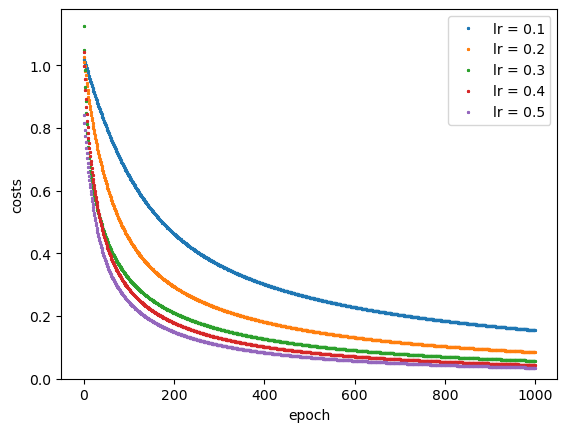

============ Prediction for lr = 0.1 ============
X= (0, 0)
result =  0.18386501640376193
X= (1, 0)
result =  0.9298320277526302
X= (0, 1)
result =  0.9273382124845434
X= (1, 1)
result =  0.9986696640879025
============ Prediction for lr = 0.2 ============
X= (0, 0)
result =  0.10158989391157815
X= (1, 0)
result =  0.9596784976443352
X= (0, 1)
result =  0.9599553867973891
X= (1, 1)
result =  0.9998018501223679
============ Prediction for lr = 0.3 ============
X= (0, 0)
result =  0.06863487706668957
X= (1, 0)
result =  0.9727552875715082
X= (0, 1)
result =  0.9726909997152119
X= (1, 1)
result =  0.9999420558953548
============ Prediction for lr = 0.4 ============
X= (0, 0)
result =  0.05201509621421438
X= (1, 0)
result =  0.979351207021015
X= (0, 1)
result =  0.9792245489230977
X= (1, 1)
result =  0.9999754562057318
============ Prediction for lr = 0.5 ============
X= (0, 0)
result =  0.04177461868067056
X= (1, 0)
result =  0.9833897246813126
X= (0, 1)
result =  0.9833057730988609
X= (1

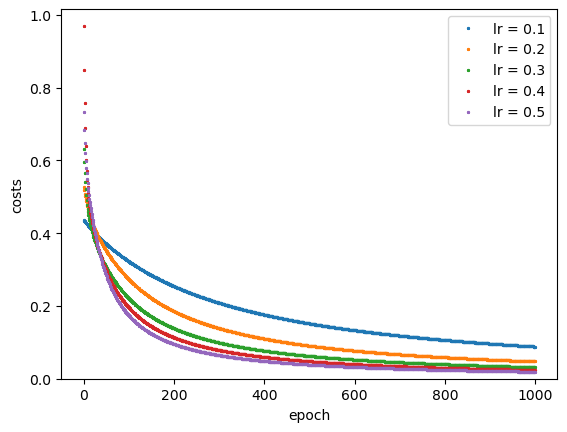

============ Prediction for lr = 0.1 ============
X= (0, 0)
result =  0.5017695747607989
X= (1, 0)
result =  0.5000648540745546
X= (0, 1)
result =  0.5004905465702887
X= (1, 1)
result =  0.49878582104007524
============ Prediction for lr = 0.2 ============
X= (0, 0)
result =  0.4999898775138085
X= (1, 0)
result =  0.49999837276926873
X= (0, 1)
result =  0.499998450193912
X= (1, 1)
result =  0.5000069454493732
============ Prediction for lr = 0.3 ============
X= (0, 0)
result =  0.5000007228690095
X= (1, 0)
result =  0.5000001150883563
X= (0, 1)
result =  0.5000001117908328
X= (1, 1)
result =  0.4999995040101794
============ Prediction for lr = 0.4 ============
X= (0, 0)
result =  0.5000000232730633
X= (1, 0)
result =  0.500000003651062
X= (0, 1)
result =  0.5000000036534062
X= (1, 1)
result =  0.49999998403140494
============ Prediction for lr = 0.5 ============
X= (0, 0)
result =  0.5000000001270886
X= (1, 0)
result =  0.5000000000199539
X= (0, 1)
result =  0.5000000000199339
X= (1, 1

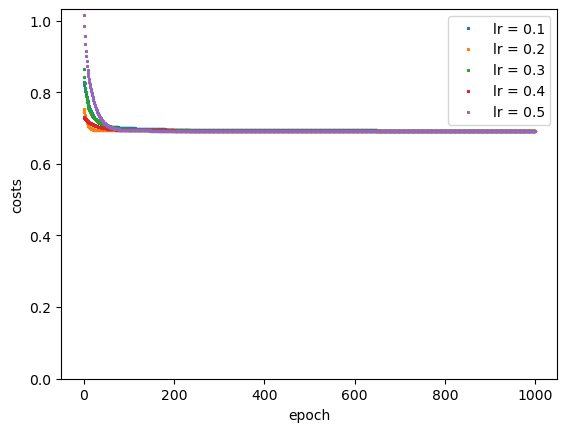

In [1]:
from math import exp, log
import matplotlib.pyplot as plt
import numpy as np


class logisitic_regression_model():
    def __init__(self, X, Y):
        self.w = np.random.normal(size=len(X[0]))
        self.b = np.random.random_sample()
        self.X = X
        self.Y = Y

    def sigmoid(self, z):
        return 1 / (1 + exp(-z))

    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

    def train(self, lr=0.1):
        dw = np.array([0.0 for _ in range(len(self.X[0]))])
        db = 0.0
        m = len(self.X)
        cost = 0.0
        for x, y in zip(self.X, self.Y):
            a = self.predict(x)
            if y == 1:
                cost -= log(a)
            else:
                cost -= log(1 - a)
            dw += (a - y) * np.asarray(x)
            db += (a - y)
        cost /= m
        self.w -= lr * dw / m
        self.b -= lr * db / m
        return cost


X = [(0, 0), (1, 0), (0, 1), (1, 1)]
Ys = [
    [0, 0, 0, 1],  # AND
    [0, 1, 1, 1],  # OR
    [0, 1, 1, 0],  # XOR
]
lrs = [round(0.1 + i * 0.1, 1) for i in range(5)]

for Y in Ys:
    plt.figure()
    for lr in lrs:
        epochs = []
        costs = []
        model = logisitic_regression_model(X, Y)
        for epoch in range(1000):
            cost = model.train(lr)
            epochs.append(epoch)
            costs.append(cost)
        plt.plot(epochs, costs, '*', label='lr = {}'.format(lr), markersize=2)
        print("============ Prediction for lr = {} ============".format(lr))
        for x in X:
            print('X= {}'.format(x))
            print('result = ', model.predict(x))
    plt.legend()
    plt.ylim(0)
    plt.xlabel('epoch')
    plt.ylabel('costs')
    plt.show()


